# Mobile Price Range Classification

# Problem Statement
Market size of mobile phones if growing everyday and so is the competition.To capture the maximum market electronics companies try to make improvements in their products. However, sales of mobile phones depend on various factors like demand, technology, marketing, brand, availability, user experience, service, price, etc. As we understand that selling price makes a huge difference when it comes to sales and profits. Estimating an optimal price for a new mobile phone can be a tricky task especially when you are new in the business or when you want to launch a new kind of mobile phone in the market.

As part of this exercise we will try to estimate the price range for a given mobile phone using given feature information. These details are collected from various similar companies.

# Attribute Information¶
id : ID

battery_power : Total energy a battery can store in one time measured in mAh

blue : Has bluetooth or not

clock_speed : speed at which microprocessor executes instructions

dual_sim : Has dual sim support or not

fc : Front Camera megapixels

four_g : Has 4G or not

int_memory : Internal Memory in Gigabytes

m_dep : Mobile Depth in cm

mobile_wt : Weight of mobile phone

n_cores : Number of cores of processor

pc : Primary Camera mega pixels

px_height: Pixel Resolution Height

px_width: Pixel Resolution Width

ram: Random Access Memory in Megabytes

sc_h : Screen Height of mobile in cm

sc_w : Screen Width of mobile in cm

talk_time : longest time that a single battery charge will last when you are

three_g : Has 3G or not

touch_screen : Has touch screen or not

wifi : Has wifi or not

price_range : This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost)

# # Table of Content
Import Libraries

Setting options

Read Data

Data Analysis and Preparation

4.1 - Understanding the Dataset

4.1.1 - Data Types

4.1.2 - Summary Statistics

4.1.3 - Missing Values

4.1.3 - Missing Values

4.1.4 - Correlation

4.1.5 - Discover Outliers with Visualization

4.1.6 - Visualizing features having strongest relation with target variable

Logistic Regression

Conclusion and Interpretation

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
data=pd.read_csv("Mobile.csv")

In [3]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


# 2. Setting Options

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
import os
os.getcwd()

'C:\\Users\\Home\\Desktop\\python course\\logistic regression\\Week-2 Supervised Learning\\Week-2 Supervised Learning\\Sample Case -1'

# 3. Read Data

In [6]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [7]:
data.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [8]:
data.describe(include="all")

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [9]:
data.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [10]:
data.shape

(2000, 21)

In [11]:
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [13]:
data["price_range"].value_counts()

0    500
1    500
2    500
3    500
Name: price_range, dtype: int64

(array([215., 183., 206., 200., 189., 219., 202., 181., 197., 208.]),
 array([ 256. ,  630.2, 1004.4, 1378.6, 1752.8, 2127. , 2501.2, 2875.4,
        3249.6, 3623.8, 3998. ]),
 <BarContainer object of 10 artists>)

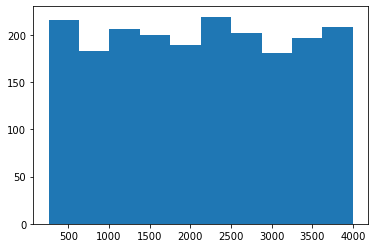

In [14]:
plt.hist(data["ram"])

(array([223., 199., 210., 199., 190., 185., 193., 201., 197., 203.]),
 array([ 501. ,  650.7,  800.4,  950.1, 1099.8, 1249.5, 1399.2, 1548.9,
        1698.6, 1848.3, 1998. ]),
 <BarContainer object of 10 artists>)

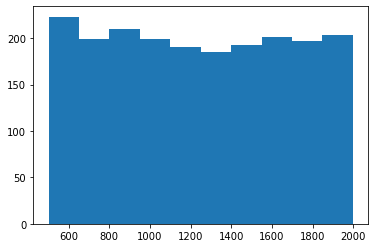

In [15]:
plt.hist(data[ 'battery_power'])

In [16]:
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


# Study summary statistics

In [17]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [18]:
data.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

# Study correlation

In [19]:
corelation=data.corr()
corelation.style.background_gradient(cmap="magma")

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,0.031441,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,-0.009952,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,-0.005245,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,-0.017143,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,0.644595,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,-0.005598,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,-0.033273,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,0.026282,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,0.018844,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,-0.001193,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


<AxesSubplot:>

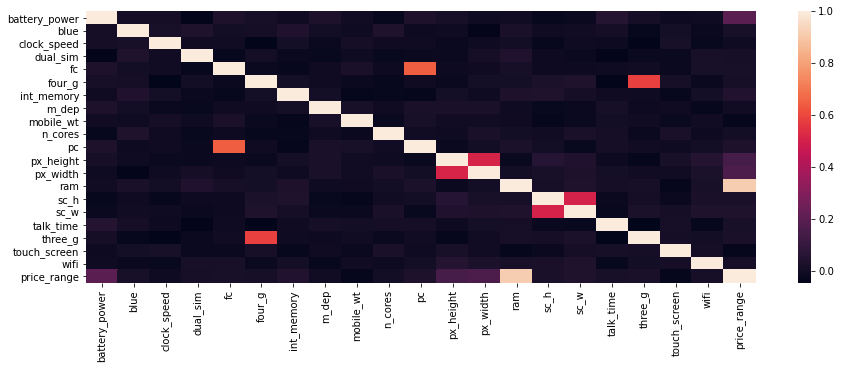

In [20]:
plt.figure(figsize=(15,5))
sns.heatmap(corelation)

In [21]:
pd.crosstab(data["ram"],data["price_range"])

price_range,0,1,2,3
ram,,,,
256,1,0,0,0
258,2,0,0,0
259,1,0,0,0
262,1,0,0,0
263,1,0,0,0
...,...,...,...,...
3990,0,0,0,1
3991,0,0,0,2
3993,0,0,0,1


# Detect outliers

In [22]:
sns

<module 'seaborn' from 'E:\\Anacondafiles\\lib\\site-packages\\seaborn\\__init__.py'>

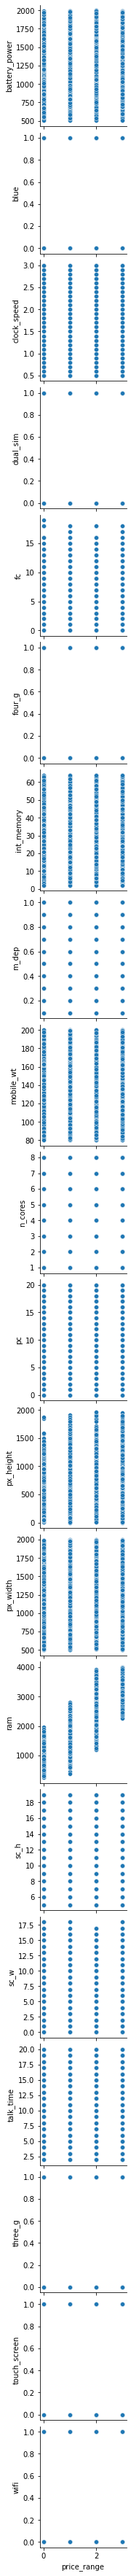

In [23]:
sns.pairplot(data=data,x_vars=["price_range"],y_vars=['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'])

<AxesSubplot:>

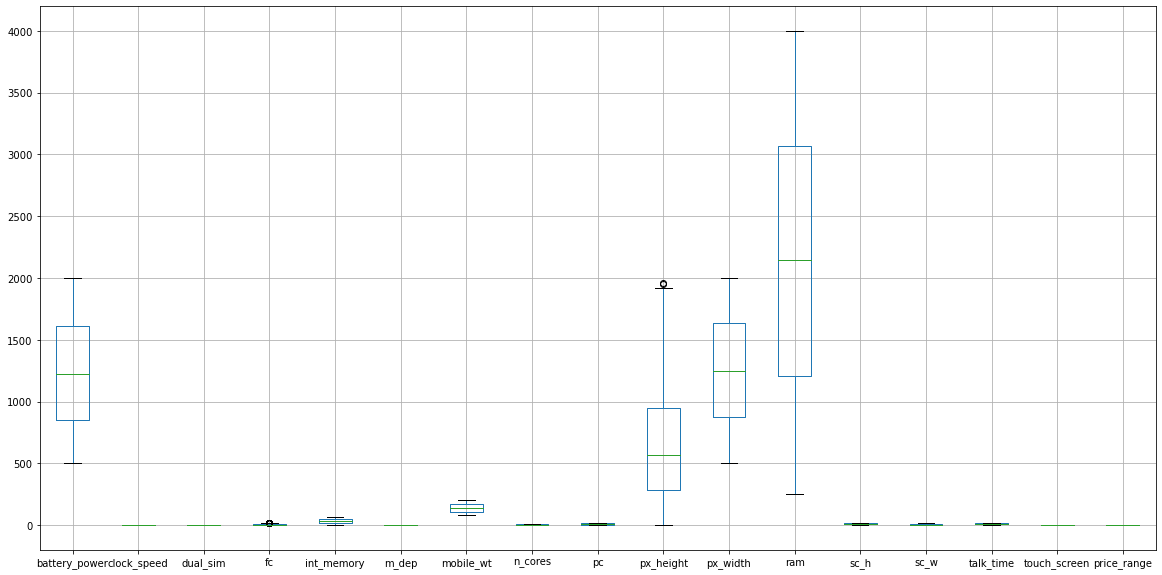

In [24]:
data.boxplot(column = ['battery_power', 'clock_speed', 'dual_sim', 'fc',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 
       'touch_screen', 'price_range'], figsize = (20,10))

# Elemenating multi-colinearity 

In [27]:
Y=data[["price_range"]]
X=data.drop("price_range",axis=1)

In [31]:
from  sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [34]:
x_train.shape

(1400, 20)

In [35]:
x_test.shape

(600, 20)

In [36]:
from sklearn.preprocessing import StandardScaler

In [38]:
scaler=StandardScaler()
X_train=scaler.fit_transform(x_train)
X_test= scaler.fit_transform(x_test)

In [43]:
X_train=pd.DataFrame(X_train,columns=x_train.columns)
X_test=pd.DataFrame(X_test,columns=x_train.columns)

In [52]:
import statsmodels.api as sm
x1=sm.add_constant(X_train)
result1=sm.OLS(y_train.values.reshape(-1,1),x1).fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     810.7
Date:                Sun, 22 Aug 2021   Prob (F-statistic):               0.00
Time:                        12:25:13   Log-Likelihood:                -373.63
No. Observations:                1400   AIC:                             789.3
Df Residuals:                    1379   BIC:                             899.4
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.4793      0.009    173.847

In [55]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [59]:
vif=pd.DataFrame()
vif["Features"]=X_train.columns
vif["VIF"]=[variance_inflation_factor(X.values,i) for i in range(X_train.shape[1])]
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
8,mobile_wt,12.972548
12,px_width,11.766282
14,sc_h,11.510780
0,battery_power,8.076717
10,pc,6.228797
17,three_g,6.191783
16,talk_time,4.859144
13,ram,4.688608
9,n_cores,4.646070
11,px_height,4.262680


In [69]:
X_train=X_train.drop(["mobile_wt","px_width","sc_h"],axis=1)


In [70]:
import statsmodels.api as sm
x1=sm.add_constant(X_train)
result1=sm.OLS(y_train.values.reshape(-1,1),x1).fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     860.9
Date:                Sun, 22 Aug 2021   Prob (F-statistic):               0.00
Time:                        12:45:59   Log-Likelihood:                -440.89
No. Observations:                1400   AIC:                             917.8
Df Residuals:                    1382   BIC:                             1012.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.4793      0.009    165.873

In [71]:
vif=pd.DataFrame()
vif["Features"]=X_train.columns
vif["VIF"]=[variance_inflation_factor(X.values,i) for i in range(X_train.shape[1])]
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
8,n_cores,12.972548
12,sc_w,11.766282
14,three_g,11.510780
0,battery_power,8.076717
10,px_height,6.228797
16,wifi,4.859144
13,talk_time,4.688608
9,pc,4.646070
11,ram,4.262680
2,clock_speed,4.260479


In [72]:
X_train=X_train.drop(["fc","m_dep"],axis=1)

In [73]:
import statsmodels.api as sm
x1=sm.add_constant(X_train)
result1=sm.OLS(y_train.values.reshape(-1,1),x1).fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     976.8
Date:                Sun, 22 Aug 2021   Prob (F-statistic):               0.00
Time:                        12:48:07   Log-Likelihood:                -441.08
No. Observations:                1400   AIC:                             914.2
Df Residuals:                    1384   BIC:                             998.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.4793      0.009    165.970

In [74]:
vif=pd.DataFrame()
vif["Features"]=X_train.columns
vif["VIF"]=[variance_inflation_factor(X.values,i) for i in range(X_train.shape[1])]
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
8,px_height,12.972548
12,three_g,11.766282
14,wifi,11.510780
0,battery_power,8.076717
10,sc_w,6.228797
13,touch_screen,4.688608
9,ram,4.646070
11,talk_time,4.262680
2,clock_speed,4.260479
6,n_cores,3.961239


In [75]:
X_train=X_train.drop(["three_g","sc_w"],axis=1)

In [76]:
import statsmodels.api as sm
x1=sm.add_constant(X_train)
result1=sm.OLS(y_train.values.reshape(-1,1),x1).fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     1129.
Date:                Sun, 22 Aug 2021   Prob (F-statistic):               0.00
Time:                        12:50:01   Log-Likelihood:                -441.14
No. Observations:                1400   AIC:                             910.3
Df Residuals:                    1386   BIC:                             983.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.4793      0.009    166.083

In [77]:
vif=pd.DataFrame()
vif["Features"]=X_train.columns
vif["VIF"]=[variance_inflation_factor(X.values,i) for i in range(X_train.shape[1])]
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
8,px_height,12.972548
12,wifi,11.766282
0,battery_power,8.076717
10,talk_time,6.228797
9,ram,4.646070
11,touch_screen,4.262680
2,clock_speed,4.260479
6,n_cores,3.961239
7,pc,3.911115
4,four_g,3.413529


In [78]:
X_train=X_train.drop(["talk_time","touch_screen"],axis=1)

In [79]:
import statsmodels.api as sm
x1=sm.add_constant(X_train)
result1=sm.OLS(y_train.values.reshape(-1,1),x1).fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     1334.
Date:                Sun, 22 Aug 2021   Prob (F-statistic):               0.00
Time:                        12:51:17   Log-Likelihood:                -441.73
No. Observations:                1400   AIC:                             907.5
Df Residuals:                    1388   BIC:                             970.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.4793      0.009    166.133

In [80]:
vif=pd.DataFrame()
vif["Features"]=X_train.columns
vif["VIF"]=[variance_inflation_factor(X.values,i) for i in range(X_train.shape[1])]
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
8,px_height,12.972548
0,battery_power,8.076717
10,wifi,6.228797
9,ram,4.646070
2,clock_speed,4.260479
6,n_cores,3.961239
7,pc,3.911115
4,four_g,3.413529
5,int_memory,3.194321
3,dual_sim,2.015006


In [87]:
X_train=X_train.drop(["pc"],axis=1)

In [88]:
x1=sm.add_constant(X_train)
result1=sm.OLS(y_train.values.reshape(-1,1),x1).fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     1834.
Date:                Sun, 22 Aug 2021   Prob (F-statistic):               0.00
Time:                        12:53:31   Log-Likelihood:                -443.49
No. Observations:                1400   AIC:                             905.0
Df Residuals:                    1391   BIC:                             952.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.4793      0.009    166.103

In [89]:
vif=pd.DataFrame()
vif["Features"]=X_train.columns
vif["VIF"]=[variance_inflation_factor(X.values,i) for i in range(X_train.shape[1])]
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
0,battery_power,8.076717
2,dual_sim,4.260479
6,ram,3.961239
7,wifi,3.911115
4,int_memory,3.413529
5,px_height,3.194321
3,four_g,2.015006
1,clock_speed,1.981927


In [90]:
X_train=X_train.drop(["clock_speed","dual_sim","four_g"],axis=1)
x1=sm.add_constant(X_train)
result1=sm.OLS(y_train.values.reshape(-1,1),x1).fit()
print(result1.summary())
vif=pd.DataFrame()
vif["Features"]=X_train.columns
vif["VIF"]=[variance_inflation_factor(X.values,i) for i in range(X_train.shape[1])]
vif=vif.sort_values(by="VIF",ascending=False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     2923.
Date:                Sun, 22 Aug 2021   Prob (F-statistic):               0.00
Time:                        12:55:01   Log-Likelihood:                -447.32
No. Observations:                1400   AIC:                             906.6
Df Residuals:                    1394   BIC:                             938.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.4793      0.009    165.828

In [92]:
cols=X_train.columns

In [93]:
X_test=X_test[cols]

In [97]:
X_train=X_train.drop("wifi",1)
X_test=X_test.drop("wifi",1)

In [98]:
X_train.corr().style.background_gradient("magma")

,battery_power,int_memory,px_height,ram
battery_power,1.000000,0.003609,0.023123,-0.012037
int_memory,0.003609,1.000000,0.022705,0.034529
px_height,0.023123,0.022705,1.000000,-0.024603
ram,-0.012037,0.034529,-0.024603,1.000000


In [99]:
vif=pd.DataFrame()
vif["Features"]=X_train.columns
vif["VIF"]=[variance_inflation_factor(X.values,i) for i in range(X_train.shape[1])]
vif=vif.sort_values(by="VIF",ascending=False)
print(vif)

        Features       VIF
0  battery_power  8.076717
2      px_height  4.260479
3            ram  2.015006
1     int_memory  1.981927


In [100]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0)
model.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [101]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 2, 1, 0, 2, 2, 3, 0, 3, 1, 0, 3, 0, 0, 1, 1, 1, 3, 3,
       1, 2, 3, 2, 2, 3, 2, 2, 2, 1, 2, 0, 3, 3, 0, 0, 0, 0, 1, 0, 2, 1,
       0, 0, 2, 2, 1, 2, 2, 3, 1, 3, 1, 3, 1, 3, 3, 1, 0, 2, 1, 3, 2, 1,
       0, 2, 3, 2, 1, 1, 0, 3, 3, 0, 2, 1, 0, 0, 0, 3, 1, 2, 3, 2, 2, 0,
       1, 1, 3, 0, 1, 1, 2, 2, 3, 0, 2, 3, 3, 2, 0, 1, 2, 0, 0, 1, 0, 2,
       0, 3, 1, 1, 2, 2, 3, 1, 2, 1, 2, 0, 0, 0, 3, 0, 1, 0, 0, 1, 0, 2,
       0, 3, 3, 0, 3, 2, 1, 0, 0, 0, 3, 1, 0, 2, 0, 0, 0, 1, 3, 3, 2, 1,
       0, 1, 1, 0, 3, 1, 3, 1, 3, 2, 3, 1, 2, 2, 3, 2, 2, 0, 2, 2, 0, 3,
       3, 0, 0, 2, 0, 3, 0, 0, 3, 3, 3, 0, 2, 1, 2, 2, 2, 3, 0, 1, 2, 3,
       3, 1, 3, 2, 0, 1, 2, 2, 2, 1, 0, 2, 0, 3, 2, 0, 2, 0, 1, 0, 2, 1,
       0, 1, 2, 1, 3, 3, 0, 3, 2, 1, 0, 1, 3, 3, 2, 1, 0, 1, 3, 2, 3, 3,
       1, 2, 0, 1, 2, 0, 3, 3, 3, 1, 2, 1, 0, 1, 1, 3, 2, 0, 3, 1, 1, 1,
       2, 1, 2, 0, 2, 2, 2, 0, 0, 1, 3, 3, 0, 1, 1, 2, 3, 1, 2, 2, 2, 0,
       0, 3, 0, 0, 1, 3, 2, 3, 0, 0, 1, 2, 3, 2, 1,

In [105]:
print(metrics.classification_report(y_test, y_pred, digits=2))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       135
           1       0.85      0.82      0.83       149
           2       0.87      0.82      0.84       168
           3       0.92      0.90      0.91       148

    accuracy                           0.88       600
   macro avg       0.88      0.88      0.88       600
weighted avg       0.88      0.88      0.87       600



<AxesSubplot:>

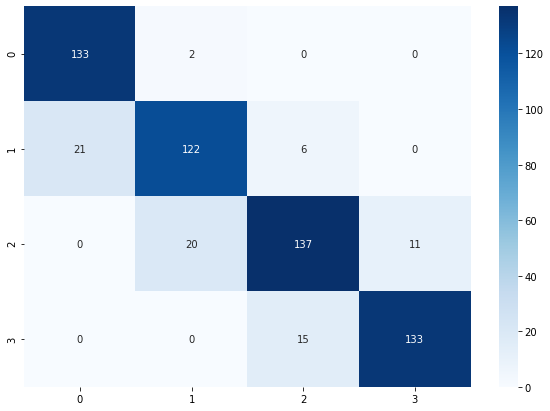

In [107]:
conf_mat = metrics.confusion_matrix(y_test, y_pred)
df_conf_mat = pd.DataFrame(conf_mat)
plt.figure(figsize = (10,7))
sns.heatmap(df_conf_mat, annot=True,cmap='Blues', fmt='g')

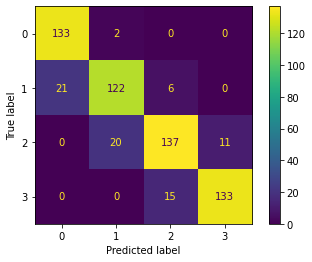

In [108]:
metrics.plot_confusion_matrix( estimator=model,
    X=X_test,
    y_true=y_test)

In [110]:
print(metrics.accuracy_score(y_test,y_pred))

0.875


In [111]:
model.score(X_train,y_train)

0.9178571428571428

In [112]:
model.score(X_test,y_test)

0.875